In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

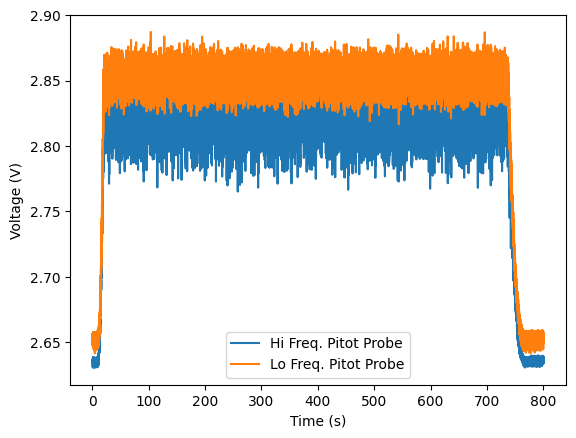

In [17]:
rho = 1.15
convFac = 1.016 #Volts -> mmHg

stagprobe = pd.read_excel('Labjack/Mar14WTData/results100p.xlsx')
time_col = 'Time Elapsed (s)'
sensor0_col = 'Sensor 0 Voltage (V)'
sensor1_col = 'Sensor 1 Voltage (V)'

time_data = stagprobe[time_col]
sensor0_data = stagprobe[sensor0_col]
sensor1_data = stagprobe[sensor1_col]

num_volt_pts = len(sensor0_data)
num_time_pts = len(time_data)
time_end = time_data[num_time_pts-1]

volt_time_data = np.linspace(0,time_end, num_volt_pts)

fig, ax = plt.subplots()

ax.plot(time_data,sensor0_data, label='Hi Freq. Pitot Probe')
ax.plot(time_data, sensor1_data, label='Lo Freq. Pitot Probe')

ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()



(0.0, 0.005)

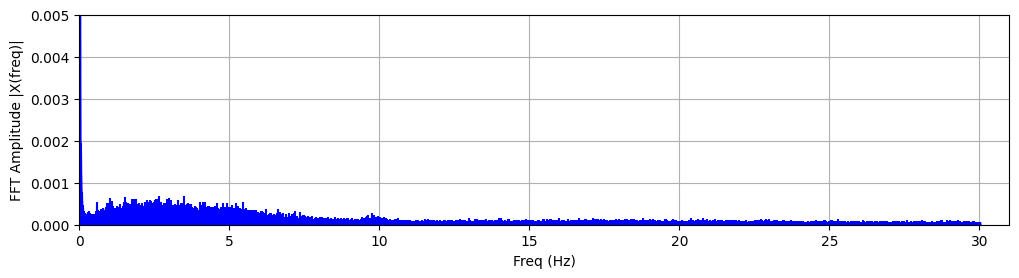

In [20]:
fullspeed = sensor0_data[0:len(sensor0_data)]

sampling_rate = len(fullspeed)/(time_end-time_data[0])

time_fullspeed = time_data[0:len(time_data)]

Y = np.fft.fft(fullspeed) #Fourier of f
N = len(Y) #num_pts -> data length
n = np.arange(N) 
T = N/sampling_rate
freq = sampling_rate * np.arange(0, int(N/2))/N  

P2 = np.abs(Y/N);
P1 = P2[0:int(N/2)]
P1[1:-2] = 2*P1[1:-2]


plt.figure(figsize = (12, 6))
plt.subplot(211)

plt.stem(freq, P1 , 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 31)
plt.ylim(0,0.005)

(0.0, 0.005)

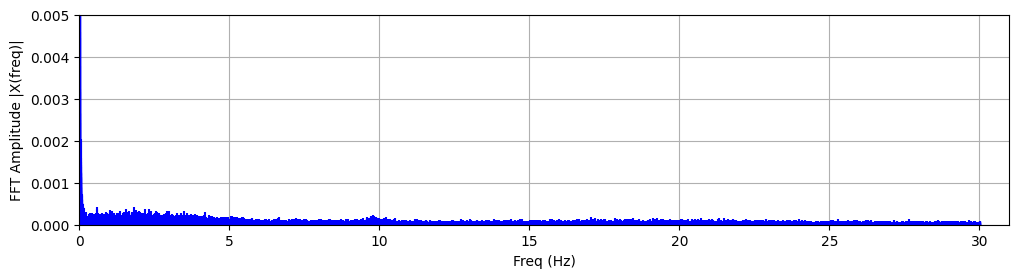

In [21]:
fullspeed = sensor1_data[0:len(sensor1_data)]

sampling_rate = len(fullspeed)/(time_end-time_data[0])

time_fullspeed = time_data[0:len(time_data)]

Y = np.fft.fft(fullspeed) #Fourier of f
N = len(Y) #num_pts -> data length
n = np.arange(N) 
T = N/sampling_rate
freq = sampling_rate * np.arange(0, int(N/2))/N  

P2 = np.abs(Y/N);
P1 = P2[0:int(N/2)]
P1[1:-2] = 2*P1[1:-2]


plt.figure(figsize = (12, 6))
plt.subplot(211)

plt.stem(freq, P1 , 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 31)
plt.ylim(0,0.005)